In [48]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

plt.style.use('bmh')
# Visualize Tractor Sales data as time series
from io import StringIO
import requests
import os
print(os.getcwd())

E:\MY DATA\Data Science\Datasets


In [49]:
os.chdir('E:\\MY DATA\\Data Science\\Datasets')

In [50]:
sales_data = pd.read_csv('PH-Sales.csv')
sales_data.tail(10)

,Month-Year,Number of Tractor Sold
134,Mar-14,587
135,Apr-14,710
136,May-14,793
137,Jun-14,749
138,Jul-14,871
139,Aug-14,848
140,Sep-14,640
141,Oct-14,581
142,Nov-14,519
143,Dec-14,605


In [51]:
sales_data.shape

(144, 2)

In [52]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [53]:
import calendar
sales_data['Month'] = dates.month
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,1
1,Feb-03,157,2
2,Mar-03,185,3
3,Apr-03,199,4
4,May-03,203,5


In [54]:
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month
0,Jan-03,141,Jan
1,Feb-03,157,Feb
2,Mar-03,185,Mar
3,Apr-03,199,Apr
4,May-03,203,May


In [55]:
sales_data['Year'] = dates.year
sales_data.head(5)

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [56]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.head(5)

,Number of Tractor Sold,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [57]:
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data.head(5)

,Tractor-Sales,Month,Year
0,141,Jan,2003
1,157,Feb,2003
2,185,Mar,2003
3,199,Apr,2003
4,203,May,2003


In [58]:
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]
sales_data.head(5)

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [59]:
# set the dates as the index of the dataframe, so that it can be treated as a
# time-series dataframe
sales_data.set_index(dates, inplace=True)
sales_data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


Text(0,0.5,'Tractor Sales')

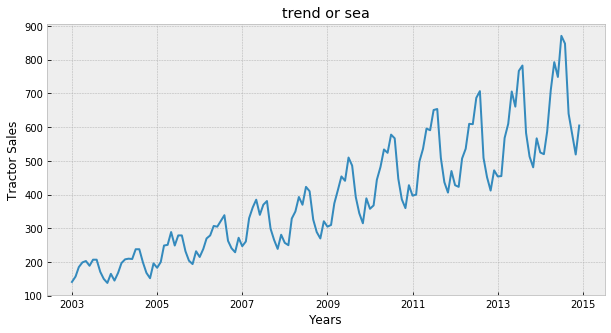

In [60]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']
plt.figure(figsize=(10, 5))
plt.plot(sales_data['Tractor-Sales'])
plt.title("trend or sea")
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

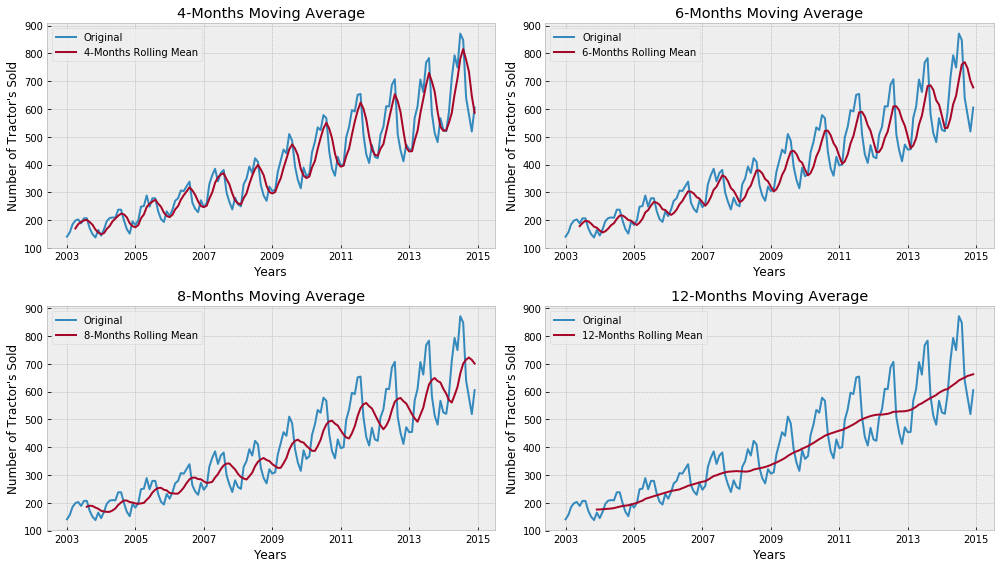

In [14]:
# PH Trend - Time Series Decomposition
# remove wrinkles from our time series using moving average.
# moving average of different time periods i.e. 4,6,8, and 12 months
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

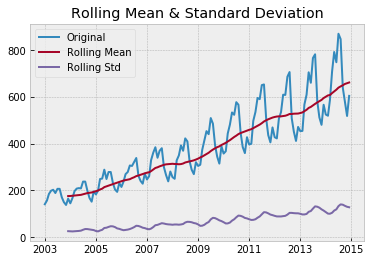

In [15]:
'''# 12-month moving average produces a wrinkle free curve.
# There is expected monthly-seasonal effect in our data.'''
# plot the rolling mean and standard deviation on window of 12 months.
# Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
# PH Tractor - Dicky Fuller Test on the timeseries
# run the Dicky Fuller Test on the timeseries and
# verify the null hypothesis that the TS is non-stationary.
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


In [17]:
'''# Though the variation in standard deviation is small,
# rolling mean is clearly increasing with time and
# this is not a stationary series.
# we observe the moving average over months that there is a monhly pattern,
'''
# PH Tractor Seasonality – Time Series Decomposition
# The first thing to do is to see how number of tractors sold vary on a
# month on month basis. plot a stacked annual plot to observe seasonality
sales_data.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [18]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [19]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


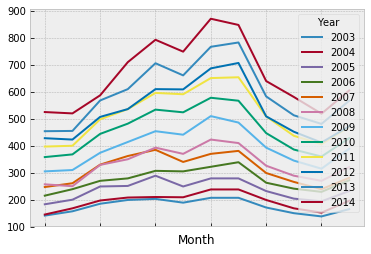

In [20]:
monthly_sales_data.plot()

In [21]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")

In [22]:
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


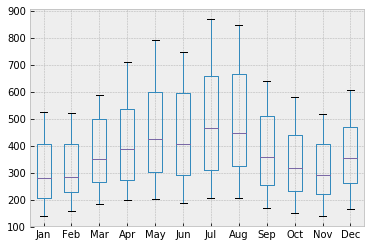

In [23]:
yearly_sales_data.boxplot()

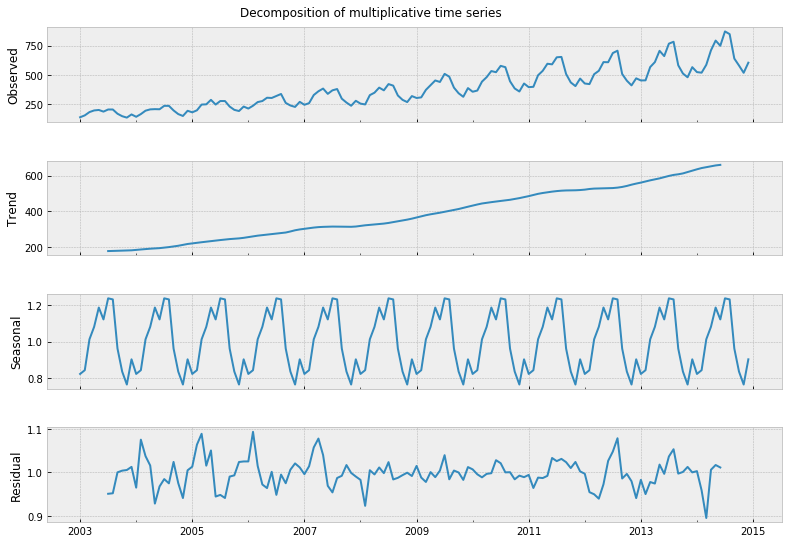

In [24]:
'''# Important Inferences
# The tractor sales have been increasing without fail every year.
# July and August are the peak months for tractor sales and the variance and
# the mean value in July and August are also much higher than any of the
# other months.
# We can see a seasonal cycle of 12 months where the mean value of each month
# starts with a increasing trend in the beginning of the year and drops down
# towards the end of the year. We can see a seasonal effect with a cycle of
# 12 months.'''
# PH Tractor Irregular Remainder
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0,0.5,'Tractor Sales')

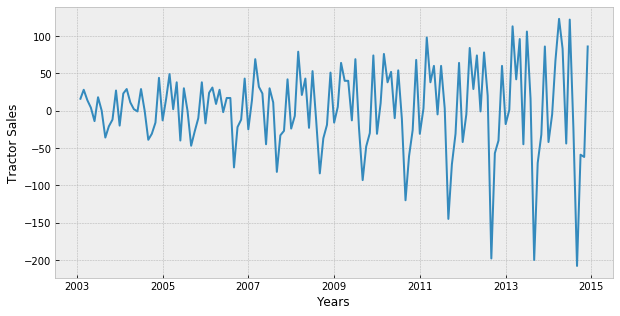

In [25]:
# Step 2: Difference data to make data stationary on mean (remove trend)
plt.figure(figsize=(10, 5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0,0.5,'Tractor Sales')

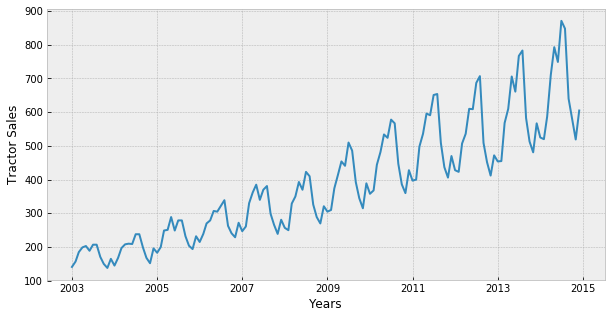

In [26]:
# original
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

Text(0,0.5,'Log (Tractor Sales)')

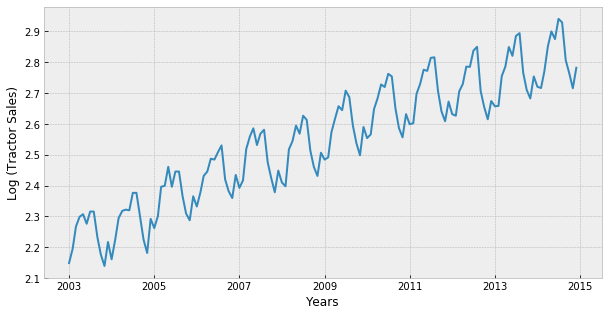

In [27]:
# Step 3: log transform data to make data stationary on variance
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')


Text(0,0.5,'Differenced Log (Tractor Sales)')

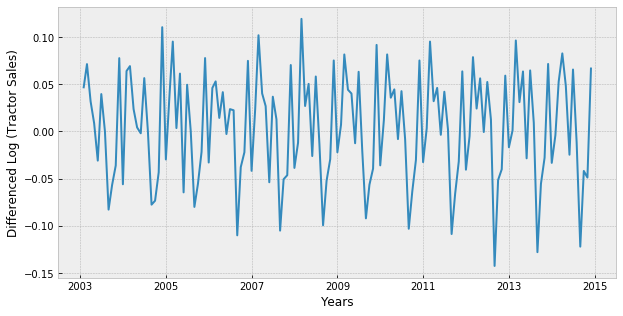

In [28]:
# Step 4: Difference log transform data to make data stationary on both mean and
# variance
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [29]:
# Step 5: Plot ACF and PACF to identify potential AR and MA model
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)
sales_ts_log.head(5)

2003-01-01    2.149219
2003-02-01    2.195900
2003-03-01    2.267172
2003-04-01    2.298853
2003-05-01    2.307496
Freq: MS, Name: Tractor-Sales, dtype: float64

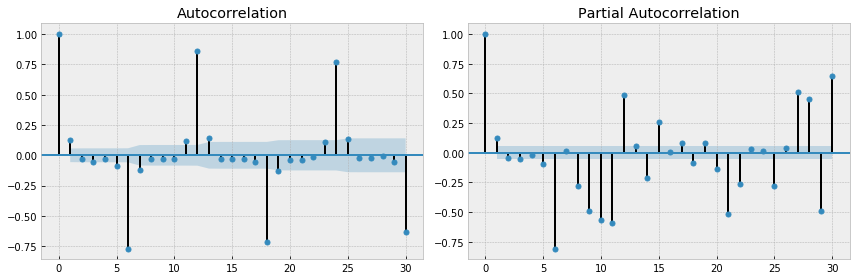

In [30]:
sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

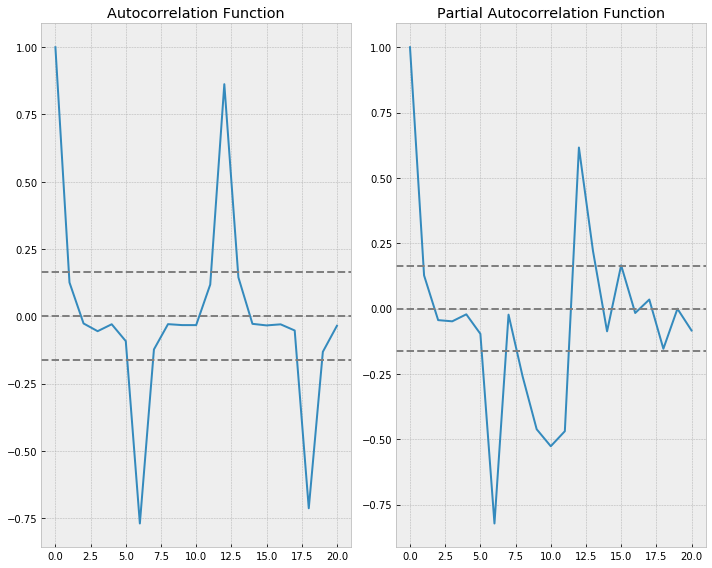

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(sales_ts_log_diff, nlags=20)
lag_pacf = pacf(sales_ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(10,8))

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sales_ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sales_ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [33]:
# Step 6: Identification of best fit ARIMA model
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [34]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [35]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,order = param,seasonal_order = param_seasonal,
                                                   enforce_stationarity=True,
                                                   enforce_invertibility=True)
                
            results = temp_model.fit()
        # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
#print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-733.7742919288131


In [37]:
#AIC & BIC
blog_param_order = (0, 1, 1)
blog_param_seasonal_order = (0, 1, 1, 12)
blog_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
order=blog_param_order,
seasonal_order=blog_param_seasonal_order,
enforce_stationarity=True,
enforce_invertibility=True)
blog_results = blog_model.fit()
print("Blog SARIMAX{}x{}12 model - AIC:{}".format(blog_param_order, blog_param_seasonal_order, blog_results.aic))

Blog SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:-702.7857077901131


In [38]:
# Step 7: Predict sales on in-sample date using the best fit ARIMA model
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
order=(0, 1, 1),
seasonal_order=(1, 0, 1, 12),
enforce_stationarity=True,
enforce_invertibility=True)
best_results = best_model.fit()
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 370.887
Date:                            Sun, 10 May 2020   AIC                           -733.774
Time:                                    09:48:16   BIC                           -721.923
Sample:                                01-01-2003   HQIC                          -728.958
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3574      0.069     -5.195      0.000      -0.492      -0.223
ar.S.L12       0.9932      0.006   

In [39]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [40]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
sales_ts_truth = sales_ts_log['2012-01-01':]
sales_ts_truth

2012-01-01    2.631444
2012-02-01    2.626340
2012-03-01    2.705008
2012-04-01    2.729165
2012-05-01    2.785330
2012-06-01    2.784617
2012-07-01    2.836957
2012-08-01    2.849419
2012-09-01    2.706718
2012-10-01    2.655138
2012-11-01    2.614897
2012-12-01    2.673942
2013-01-01    2.657056
2013-02-01    2.658011
2013-03-01    2.754348
2013-04-01    2.785330
2013-05-01    2.848805
2013-06-01    2.820201
2013-07-01    2.884795
2013-08-01    2.893762
2013-09-01    2.765669
2013-10-01    2.710117
2013-11-01    2.682145
2013-12-01    2.753583
2014-01-01    2.720159
2014-02-01    2.716003
2014-03-01    2.768638
2014-04-01    2.851258
2014-05-01    2.899273
2014-06-01    2.874482
2014-07-01    2.940018
2014-08-01    2.928396
2014-09-01    2.806180
2014-10-01    2.764176
2014-11-01    2.715167
2014-12-01    2.781755
Freq: MS, Name: Tractor-Sales, dtype: float64

In [41]:
# Compute the mean square error
mse = ((sales_ts_forecasted - sales_ts_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

The Mean Squared Error of our forecasts is 0.0011


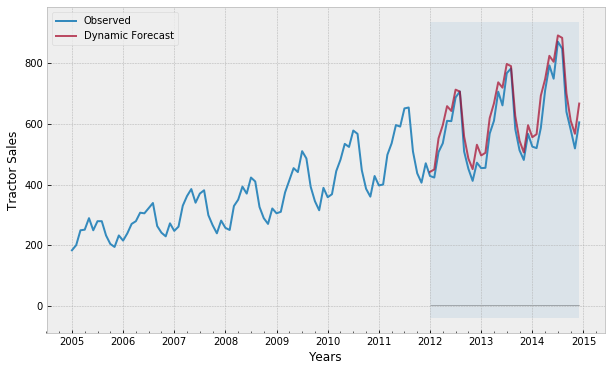

In [42]:
# The Mean Squared Error of our forecasts is 0.0011
axis = sales_ts['2005':].plot(label='Observed', figsize=(10, 6))
np.power(10, pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('2012-01-01'), sales_ts.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()


In [43]:
# Step 8: Forecast sales using the best fit ARIMA model
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

In [44]:
# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,567.466618,528.206849,609.644429,528.206849,609.644429
2015-01-01,566.197608,519.945192,616.564469,519.945192,616.564469
2015-02-01,668.778146,607.029436,736.808106,607.029436,736.808106
2015-03-01,755.189484,678.372964,840.704431,678.372964,840.704431
2015-04-01,850.198538,756.516427,955.481638,756.516427,955.481638


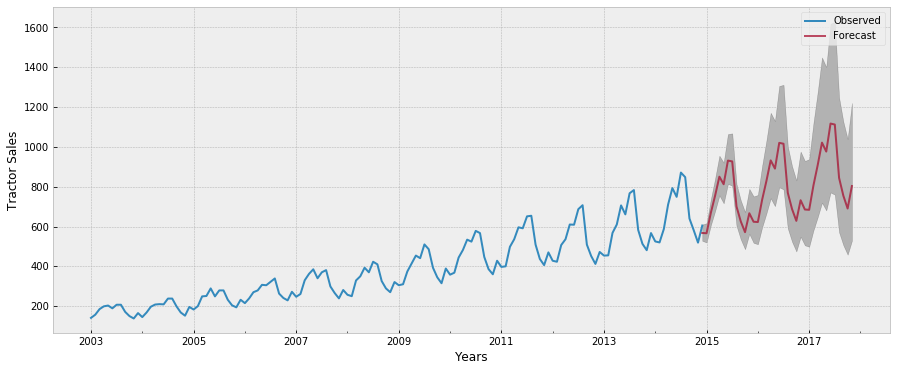

In [45]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()


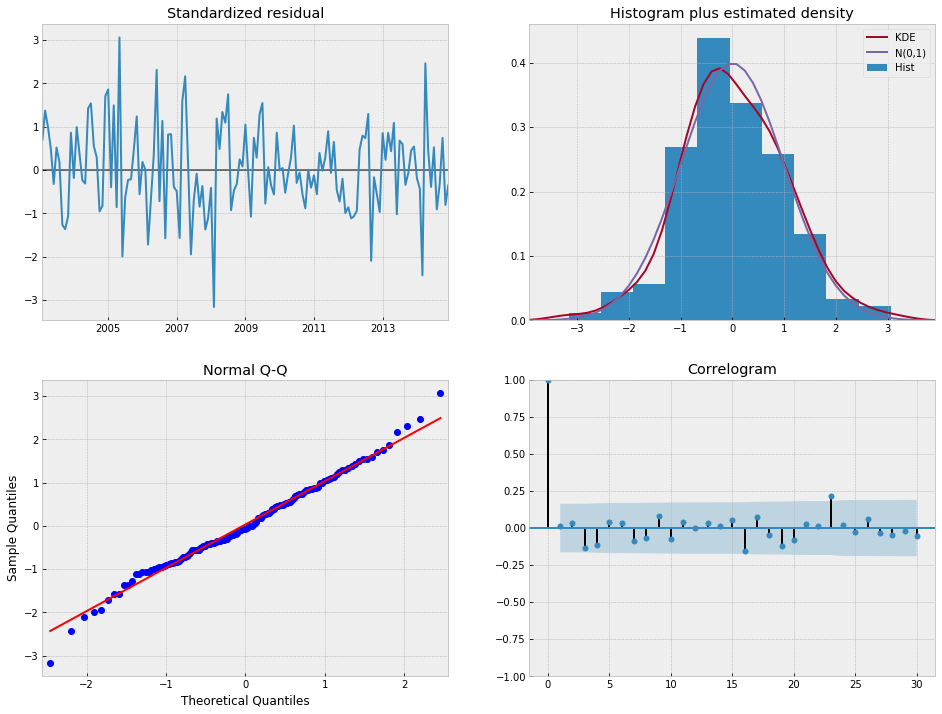

In [46]:
# Step 9: Plot ACF and PACF for residuals of ARIMA model to ensure no
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()